<a href="https://colab.research.google.com/github/stuti19989/DataVizFall2020_Colab/blob/master/Copy_of_Class_Activity_Lec03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize New York times database for COVID-19
## Case study Bristol and Suffolk, MA

## Loading US County Level Data

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# https://github.com/nytimes/covid-19-data repository location
db = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
## loading data into dataframe
df = pd.read_csv(db)

# Explore data

In [15]:
df.head(5)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [16]:
df.nunique()

date        234
county     1923
state        55
fips       3205
cases     16026
deaths     2381
dtype: int64

In [17]:
# let us get fips for 2 counties  (Bristol and Suffolk, MA)
## fips stands for : Federal Information Processing Standards
df_Bristolfips = df[(df['county'] == 'Bristol') & (df['state'] == 'Massachusetts')]['fips'].unique()[0]
df_Bristolfips

25005.0

In [18]:
df_Suffolkfips = df[(df['county']== 'Suffolk') & (df['state'] == 'Massachusetts')]['fips'].unique()[0]
df_Suffolkfips

25025.0

In [19]:
print(f'Bristol_fips =',df_Bristolfips)
print(f'Suffolk_fips =',df_Suffolkfips)

Bristol_fips = 25005.0
Suffolk_fips = 25025.0


In [20]:
def get_county_stat(df,fips):
  a = df[df['fips'] == fips][['date','county','state','cases','deaths']].copy()
  a.set_index('date',inplace=True)
  a.index = pd.to_datetime(a.index)
  return a

get_county_stat(df,df_Bristolfips).head()



,county,state,cases,deaths
date,,,,
2020-03-14,Bristol,Massachusetts,1,0
2020-03-15,Bristol,Massachusetts,1,0
2020-03-16,Bristol,Massachusetts,2,0
2020-03-17,Bristol,Massachusetts,5,0
2020-03-18,Bristol,Massachusetts,5,0


## Explore data type

In [21]:
df_Bristol = get_county_stat(df,25005)
df_Suffolk = get_county_stat(df,25025)

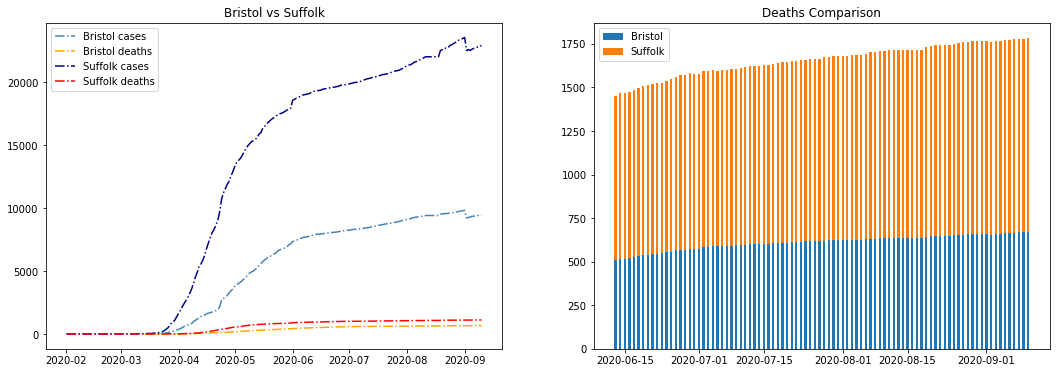

In [22]:
f,ax = plt.subplots(1,2,figsize=(18,6))

ax[0].plot(df_Bristol.index,df_Bristol.cases,'-.',color='steelblue',label='Bristol cases')
ax[0].plot(df_Bristol.index,df_Bristol.deaths,'-.',color='orange',label='Bristol deaths')

ax[0].plot(df_Suffolk.index,df_Suffolk.cases,'-.',color='darkblue',label='Suffolk cases')
ax[0].plot(df_Suffolk.index,df_Suffolk.deaths,'-.',color='red',label='Suffolk deaths')

width = 0.5
past= -90
p1 = ax[1].bar(df_Bristol.index[past:], df_Bristol.deaths[past:],width,label='Bristol')
p2 = ax[1].bar(df_Suffolk.index[past:], df_Suffolk.deaths[past:],width,bottom=df_Bristol.deaths[past:],label='Suffolk')
ax[0].set_title('Bristol vs Suffolk')
ax[1].set_title('Deaths Comparison')
ax[0].legend()
ax[1].legend()


In [23]:
df.sort_values(['date','fips'])
df['Daily_cases'] = df.groupby('fips')['cases'].diff().fillna(0)
df['Daily_cases'] = df['Daily_cases'].rolling(window=3).max()

df['Daily_deaths'] = df.groupby('fips')['deaths'].diff().fillna(0)
df['Daily_deaths'] = df['Daily_deaths'].rolling(window=3).max()


## Top 10 counties by number of cases and deaths 



```
# This is formatted as code
```





In [24]:
Filtered = df
Filtered = df.groupby(['fips','county'],as_index = False).sum()

ttc = Filtered[['county','Daily_cases','Daily_deaths']].sort_values(['Daily_cases','Daily_deaths'],ascending=False).head(10)
ttc

,county,Daily_cases,Daily_deaths
201,Los Angeles,251024.0,6129.0
203,Marin,251023.0,6128.0
202,Madera,251011.0,6128.0
358,Miami-Dade,162893.0,2803.0
360,Nassau,162892.0,2790.0
359,Monroe,162792.0,2791.0
100,Maricopa,136571.0,3143.0
102,Navajo,136563.0,3157.0
101,Mohave,136320.0,3148.0
605,Cook,132976.0,5104.0


## Death rate Per FIPS 

In [25]:
Filtered['Death_rate'] = Filtered['Daily_deaths']/Filtered['Daily_cases']*100
print(Filtered[['fips','Death_rate']])

         fips  Death_rate
0      1001.0    2.007528
1      1003.0    1.351616
2      1005.0    1.410658
3      1007.0    1.118568
4      1009.0    1.366607
...       ...         ...
3200  72151.0    0.000000
3201  72153.0    0.000000
3202  78010.0    1.757812
3203  78020.0    1.716738
3204  78030.0    1.704545

[3205 rows x 2 columns]


## <font color = red> Bonus Point</font>

### A function that makes "Folium Choropleth Map" for Weekly Cases, Weekly Deaths and Weekly Mortality Rate </font>

ALL COUNTIES

<br>

### def Folium_Choropleth(type = 'cases',date=''):

<br>

## Due for Bonus point : Friday (09/11/2020 11:59pm)